# Understanding Descriptive Statistics

Import the necessary libraries here:

In [101]:
# Libraries
import pandas as pd 
import random
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math as m
import numpy as np

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [102]:
def roll():
    die = [random.choices(range(1,7), k = 1)[0] for roll in range(10)]
    return die


##This option return multiple lists without the zero, with the zero return multiple strings equal to the number of the range 
'''def roll():
    for i in range(11):
        die = random.choices(range(10), k = 1) #[0]
        print(die) 

'''
die = roll()
df = pd.DataFrame(die)
df 

,0
0,6
1,2
2,4
3,2
4,2
5,6
6,5
7,5
8,6
9,1


In [103]:
#Second option

#def roll_dice(number):
#    return [random.randint(1, 6) for x in range(number)]

#pd.DataFrame(roll_dice(10))

In [104]:
# your code here

## Opt class -- cool one 

class Die():

    def __init__(self):
        self.sides=6

    def roll_die(self):
        for _ in range(11):
            dice=random.randint(1,self.sides)
            print("Rolling "+str(dice))
            
            
Die().roll_die()

#this will not work because to put it in a data frame we will nid an iterable like a list 

Rolling 4
Rolling 3
Rolling 6
Rolling 2
Rolling 5
Rolling 4
Rolling 5
Rolling 1
Rolling 1
Rolling 2
Rolling 2


In [105]:
##This way it would wor

class Die_list():

    def __init__(self):
        self.sides=6

    def roll_die(self):
        die = [random.randint(1,self.sides) for roll in range(10)]
        return die
            
df2 = pd.DataFrame(Die_list().roll_die())
df2

,0
0,4
1,5
2,5
3,2
4,1
5,3
6,3
7,6
8,5
9,6


#### 2.- Plot the results sorted by value.

In [106]:
# your code here

df.rename(columns = {0: 'roll'}, inplace = True)
df.sort_values(by = ['roll'], inplace = True)

df 

,roll
9,1
1,2
3,2
4,2
2,4
6,5
7,5
0,6
5,6
8,6


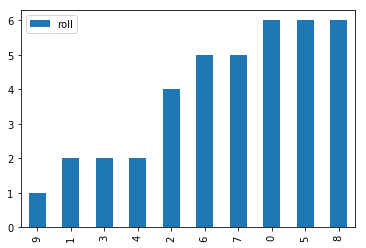

In [107]:
df.plot.bar()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

(1, 6)

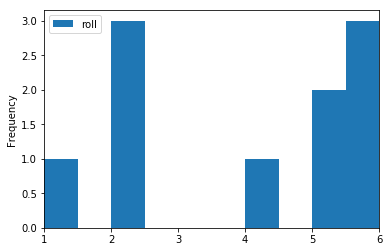

In [108]:
# your code here
df.plot.hist()
plt.xlim(1,6)

In [109]:
"""
your comments here

In the first plot the frequency is on the x axis and on the second is on the y axis.


"""

'\nyour comments here\n\nIn the first plot the frequency is on the x axis and on the second is on the y axis.\n\n\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [110]:
# your code here

def mean(x):
    m = sum(x)/len(x)
    return m

mean(die)

3.9

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [111]:
# your code here
frequency_distribution = df['roll'].value_counts()

mean(frequency_distribution)


2.0

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [112]:
# your code here

def median(l):
    l.sort()
    if len(l) % 2 == 0:
        return (l[int(len(l)/2)] + l[int(len(l)/2) -1 ])/2
    else:
        return m.ceil(l[int(len(l)/2)])
        


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

#For Odd Set of Numbers:

Steps:
Step 1: Put the numbers in order.
1, 2, 5, 6, 7, 9, 12, 15, 18, 19, 27.
Step 2: Find the median.
1, 2, 5, 6, 7, 9, 12, 15, 18, 19, 27.
Step 3: Place parentheses around the numbers above and below the median. 
Not necessary statistically, but it makes Q1 and Q3 easier to spot.
(1, 2, 5, 6, 7), 9, (12, 15, 18, 19, 27).
Step 4: Find Q1 and Q3
Think of Q1 as a median in the lower half of the data and think of Q3 as a median for the upper half of data.
(1, 2, 5, 6, 7),  9, ( 12, 15, 18, 19, 27). Q1 = 5 and Q3 = 18.
Step 5: Subtract Q1 from Q3 to find the interquartile range.
18 – 5 = 13.

What if I Have an Even Set of Numbers?

Sample question: Find the IQR for the following data set: 3, 5, 7, 8, 9, 11, 15, 16, 20, 21.

Step 1: Put the numbers in order.

3, 5, 7, 8, 9, 11, 15, 16, 20, 21.

Step 2: Make a mark in the center of the data:

3, 5, 7, 8, 9, | 11, 15, 16, 20, 21.

Step 3: Place parentheses around the numbers above and below the mark you made in Step 2–it makes Q1 and Q3 easier to spot. 

(3, 5, 7, 8, 9), | (11, 15, 16, 20, 21).

Step 4: Find Q1 and Q3

Q1 is the median (the middle) of the lower half of the data, and Q3 is the median (the middle) of the upper half of the data.

(3, 5, 7, 8, 9), | (11, 15, 16, 20, 21). Q1 = 7 and Q3 = 16.

Step 5: Subtract Q1 from Q3.

16 – 7 = 9.

This is your IQR.


In [113]:
## Think of Q1 as a median in the lower half of the data and think of Q3 as a median for the upper half of data.


def quartiles(c):
    c.sort()
    first = f[: len(c)//2]
    if len(c) % 2 == 0:
        second = c[len(c)//2 + 1: ]
    else:
        second = f[len(f)//2: ]
    q1 = median(first)
    q3 = median(second)
    return f'first quartil is {q1}', f' third quartil is {q3}'
    

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [114]:
# your code here

#with open('/Users/Shiva/Documents/DATA_ANALYTICS/week4/day_1/Labs/lab-understanding-descriptive-stats/data/roll_the_dice_hundred.csv', 'w') as f:
#    f.write()
    
dice100 = pd.read_csv('/Users/Shiva/Documents/DATA_ANALYTICS/week4/day_1/Labs/lab-understanding-descriptive-stats/data/roll_the_dice_hundred.csv')

dice100.drop(columns = 'Unnamed: 0', inplace = True)
dice100.sort_values(by=['value'], inplace = True)


dice100

,roll,value
0,0,1
47,47,1
56,56,1
9,9,1
73,73,1
...,...,...
17,17,6
11,11,6
24,24,6
21,21,6


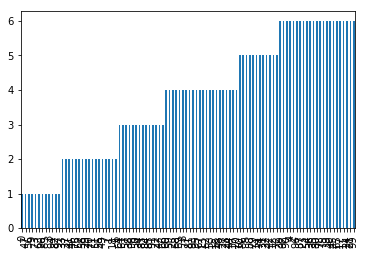

In [115]:
dice100['value'].plot.bar()

In [116]:
"""
your comments here

We see a stair shape like graph that has for its level the value of the roll and is widht is the number of times that roll
was get
"""

'\nyour comments here\n\nWe see a stair shape like graph that has for its level the value of the roll and is widht is the number of times that roll\nwas get\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [117]:
# your code here

mean(dice100['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [118]:
# your code here
fd = dice100['value'].value_counts()
fd

6    23
4    22
2    17
3    14
5    12
1    12
Name: value, dtype: int64

In [119]:
fd.sum()

100

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

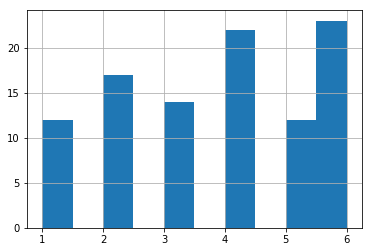

In [120]:
# your code here

dice100['value'].hist()

In [121]:
"""
The x axis show the value of each possible roll (1-6), on the y axis we can se how many of a certain roll we got 
in 100 rolls.

The mean is the number of ocurrences for the value of each roll.  mean = (6*23 + 4*22 + 2*17 + 3*14 + 5*12 + 1*12) / 100 
"""

'\nThe x axis show the value of each possible roll (1-6), on the y axis we can se how many of a certain roll we got \nin 100 rolls.\n\nThe mean is the number of ocurrences for the value of each roll.  mean = (6*23 + 4*22 + 2*17 + 3*14 + 5*12 + 1*12) / 100 \n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [122]:
# your code here

dice1000 = pd.read_csv('/Users/Shiva/Documents/DATA_ANALYTICS/week4/day_1/Labs/lab-understanding-descriptive-stats/data/roll_the_dice_thousand.csv')

dice1000.drop(columns = 'Unnamed: 0', inplace = True)
dice1000.sort_values(by=['value'], inplace = True)


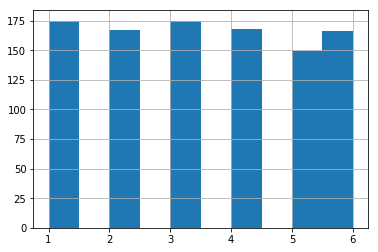

In [123]:
dice1000['value'].hist()



In [124]:
"""
your comments here

The Frequency for each roll is starting to look similar this happens because when the number of events goes twards 
infinit the frequency of getting each side is going to be almost equal because the dice is fair and each side has 
a probability of occuring of 1/6. as we can see with this random sample, we can try to see what is the probability
for each side by deviding the number of its occurences by the total (1000) and its  ~= 1/6 (170/1000 | 160/100 | 150/1000...)
"""

'\nyour comments here\n\nThe Frequency for each roll is starting to look similar this happens because when the number of events goes twards \ninfinit the frequency of getting each side is going to be almost equal because the dice is fair and each side has \na probability of occuring of 1/6. as we can see with this random sample, we can try to see what is the probability\nfor each side by deviding the number of its occurences by the total (1000) and its  ~= 1/6 (170/1000 | 160/100 | 150/1000...)\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1274c6490>]],
      dtype=object)

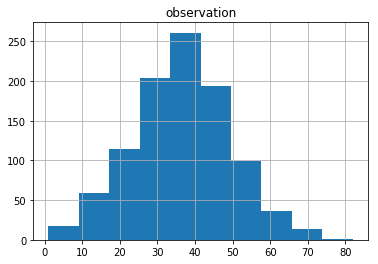

In [154]:
# your code here

db1 = pd.read_csv('/Users/Shiva/Documents/DATA_ANALYTICS/week4/day_1/Labs/lab-understanding-descriptive-stats/data/ages_population.csv')

db1.hist(bins=10)

In [126]:
"""
Guess the mean will be around the range of 30 and 40 years old. and the standard deviation will be between 18 and 8.


"""

'\nGuess the mean will be around the range of 30 and 40 years old. and the standard deviation will be between 18 and 8.\n\n\n'

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [127]:
# your code here
#MEAN
print(db1.mean())

observation    36.56
dtype: float64


In [128]:
#STANDARD DEVIATION 

print(db1.std())

observation    12.8165
dtype: float64


In [130]:
"""
Yes the value fall inside the range I guessed.
I guess this because the frequency distribution of the ages has an Gaussian Distribution.
Since 68% of values fall within 1 standard deviation of the mean, by watching the histogram I thought those were the values."""

'\nYes the value fall inside the range I guessed.\nI guess this because the frequency distribution of the ages has an Gaussian Distribution.\nSince 68% of values fall within 1 standard deviation of the mean, by watching the histogram I thought those were the values.'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125d96a10>]],
      dtype=object)

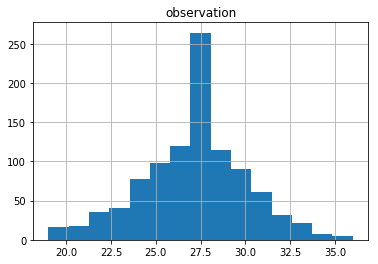

In [148]:
# your code here
db2 = pd.read_csv('/Users/Shiva/Documents/DATA_ANALYTICS/week4/day_1/Labs/lab-understanding-descriptive-stats/data/ages_population2.csv')

db2.hist(bins=15)


####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [132]:
"""
Yes now the ages are more concentrated around the mean. Also the mean is lower and the std is lower.
"""

'\nYes now the ages are more concentrated around the mean. Also the mean is lower and the std is lower.\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [149]:
# your code here
print(db2.mean())
print(db2.std())

observation    27.155
dtype: float64
observation    2.969814
dtype: float64


In [134]:
"""
The mean is lower that the mean in step 1 and also the std is lower. I think the values are much more
concentrated around the mean and since there is less depression we got a lower standard deviation.
For the mean, since it is lower it sugestes an sample composed of younger people.
"""

'\nThe mean is lower that the mean in step 1 and also the std is lower. I think the values are much more\nconcentrated around the mean and since there is less depression we got a lower standard deviation.\nFor the mean, since it is lower it sugestes an sample composed of younger people.\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126e56590>]],
      dtype=object)

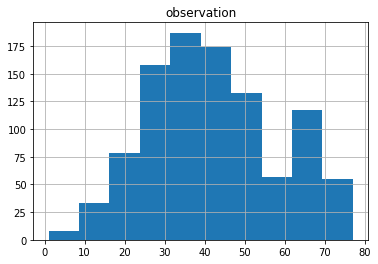

In [150]:
# your code here

db3 = pd.read_csv('../data/ages_population3.csv')
db3.hist(bins = 10)

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [146]:
# your code here
print(db3.mean())
print(db3.std())


observation    41.989
dtype: float64
observation    16.144706
dtype: float64


In [137]:
"""
The mean is higher that the mean for the sample of ages number 1, so we got an older sample.
Also the std is higher wich suggest a more spread out ages. 
Other thing is that this distribution is not symetrical, we have in the upper tail (60-70 year) of the distribution a bigger concentration
of ages that in the lower tail.
"""

'\nThe mean is higher that the mean for the sample of ages number 1, so we got an older sample.\nAlso the std is higher wich suggest a more spread out ages. \nOther thing is that this distribution is not symetrical, we have in the upper tail (60-70 year) of the distribution a bigger concentration\nof ages that in the lower tail.\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [151]:
# your code here

q1 = np.percentile(db3, 25) # first quartile - 25% of the sample
q2 = np.percentile(db3, 50) # median
q3 = np.percentile(db3, 75) # first quartile - 75% of the sample

print(f'The lowe quartil is {int(q1)}, the second {int(q2)}, the upper is {int(q3)}')

The lowe quartil is 30, the second 40, the upper is 53


In [139]:
"""

The lower quartile is further away from the mean that the upper quartile, wich mean ther is bigger concetration of ages
from in the 75% quantile. This justifies the assimetrical assumption.
The mean is lower that the median, the median is 41,989 ~= 42 years old and the median is 40. This also means that there
are a bigger frequency of ages above the median, so the mean is higher that the mean. There is a Right Skewness 

"""

'\n\nThe lower quartile is further away from the mean that the upper quartile, wich mean ther is bigger concetration of ages\nfrom in the 75% quantile. This justifies the assimetrical assumption.\nThe mean is lower that the median, the median is 41,989 ~= 42 years old and the median is 40. This also means that there\nare a bigger frequency of ages above the median, so the mean is higher that the mean. There is a Right Skewness \n\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [140]:
# your code here
np.percentile(db3, [0, 25, 50, 75, 100])


array([ 1., 30., 40., 53., 77.])

In [141]:
"""
From The Percentle 0 to Percentile 25% we go from age 1 to age 30, this compromises 25% of our sample.
From The Perecentile 75 to the Percentil 100 %, wich also corresponds to 25% of our sample, we have a range of 25 years
wich is smaller that the range between the percentil 0 and 25. So we can say that our sample is skewed right

"""

'\nFrom The Percentle 0 to Percentile 25% we go from age 1 to age 30, this compromises 25% of our sample.\nFrom The Perecentile 75 to the Percentil 100 %, wich also corresponds to 25% of our sample, we have a range of 25 years\nwich is smaller that the range between the percentil 0 and 25. So we can say that our sample is skewed right\n\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

,pop1,pop2,pop3
0,68.0,25.0,21.0
1,12.0,31.0,21.0
2,45.0,29.0,24.0
3,38.0,31.0,31.0
4,49.0,29.0,54.0
...,...,...,...
995,27.0,26.0,16.0
996,47.0,22.0,55.0
997,53.0,21.0,30.0
998,33.0,19.0,35.0


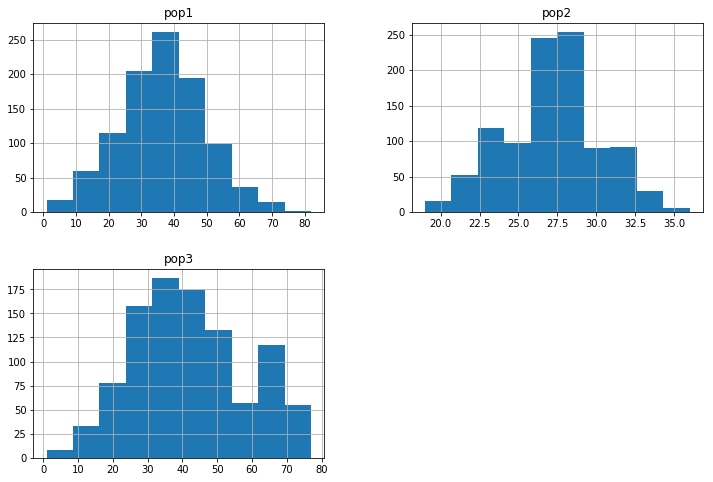

In [159]:
# your code here

total = pd.concat([db1,db2,db3], axis = 1)
total.columns=['pop1', 'pop2', 'pop3']
total.hist(figsize=(12,8), bins = 10)
total

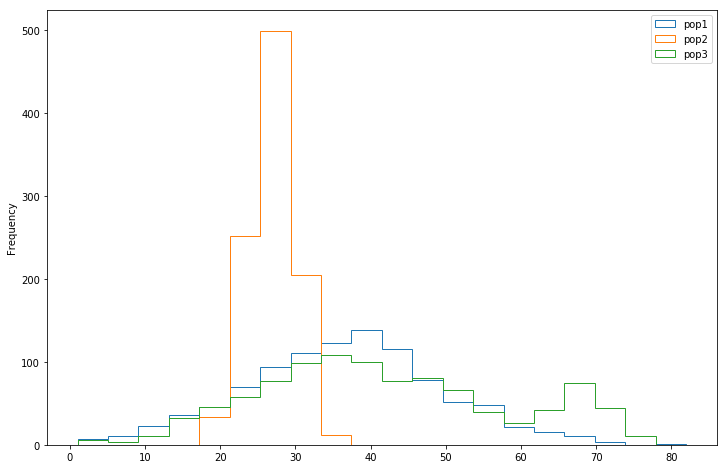

In [161]:
## IF I USE PLOT.HIST IT PLOTS ALL COLUMNS IN ONE FIGURE IF DONT USE PLOT and ONLY HIST it plots three figures 

total = pd.concat([db1,db2,db3], axis = 1)
total.columns=['pop1', 'pop2', 'pop3']
total.plot.hist(histtype = 'step', figsize=(12,8), bins = 20)

In [144]:
"""
In the graph above we can see that the popolation 2 is much younger, with a the biggest freqnecy of ages on the
30 years. The popluation 3 is the older one, with a elevate number of people within the ages of 65 and 75.
The popluation 1 is the most symetrical one and the average age is similar to the population 3.
With the width of the graphs we can see that the pop2 also is the one with lower std and the pop 3 and pop1 have a 
similar std.

The pop2 might be a a group of young people living on the same neighbourhoods, like a colege residency. And the other two
could be a family neighbourhoods, with the pop3 being an older population, like a vilage.

"""

'\nyour comments here\n'